# Artificial Neural Networks and Deep Learning

---

## Homework 2: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.


In [1]:
import os
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"

import tensorflow as tf

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

## ⚙️ Import Libraries

In [3]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import random
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.10.1
Keras version: 2.10.0
GPU devices: 1


## ⏳ Load the Data

In [4]:
data = np.load("new_mars_clean_data.npz")
training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2505, 64, 128)
Training y shape: (2505, 64, 128)
Test X shape: (10022, 64, 128)


## 🛠️ Train and Save the Model

In [5]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")

Input shape: (64, 128, 1)
Number of classes: 5


Training Set Class Distribution:
Class 0.0: 4988826 samples (24.31%)
Class 1.0: 6957538 samples (33.90%)
Class 2.0: 4776810 samples (23.28%)
Class 3.0: 3770823 samples (18.38%)
Class 4.0: 26963 samples (0.13%)


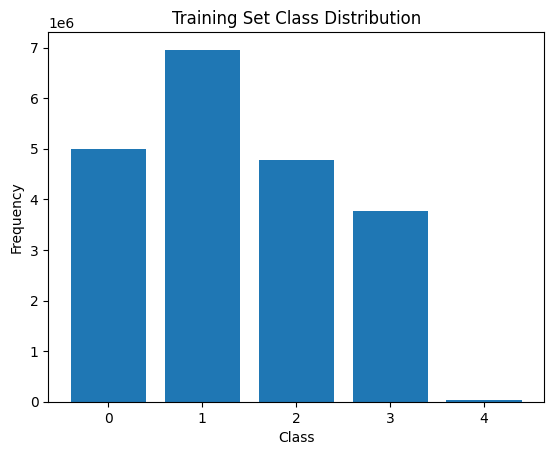

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calcola la distribuzione delle classi
def plot_class_distribution(y_data, title="Class Distribution"):
    unique, counts = np.unique(y_data, return_counts=True)
    class_distribution = dict(zip(unique, counts))

    print(f"{title}:")
    for cls, count in class_distribution.items():
        print(f"Class {cls}: {count} samples ({(count / y_data.size) * 100:.2f}%)")

    # Plot la distribuzione
    plt.bar(class_distribution.keys(), class_distribution.values())
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.xticks(ticks=list(class_distribution.keys()))
    plt.show()

# Distribuzione delle classi nei dati di allenamento
plot_class_distribution(y_train, title="Training Set Class Distribution")



In [7]:
# prompt: split x train in train test val

from sklearn.model_selection import train_test_split

print("Splitting data...")
train_val_img, test_img, train_val_lbl, test_lbl = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)
train_img, val_img, train_lbl, val_lbl = train_test_split(
    train_val_img, train_val_lbl, test_size=0.2, random_state=42
)

print("Data splitted! 0.7 - 0.2 - 0.1")

print(f"\nNumber of images:")
print(f"Train: {len(train_img)}")
print(f"Validation: {len(val_img)}")

print(f"Train shape: {train_img.shape}")
print(f"Validation shape: {val_img.shape}")


Splitting data...
Data splitted! 0.7 - 0.2 - 0.1

Number of images:
Train: 1803
Validation: 451
Train shape: (1803, 64, 128, 1)
Validation shape: (451, 64, 128, 1)


Training Set Class Distribution:
Class 0.0: 4988826 samples (24.31%)
Class 1.0: 6957538 samples (33.90%)
Class 2.0: 4776810 samples (23.28%)
Class 3.0: 3770823 samples (18.38%)
Class 4.0: 26963 samples (0.13%)


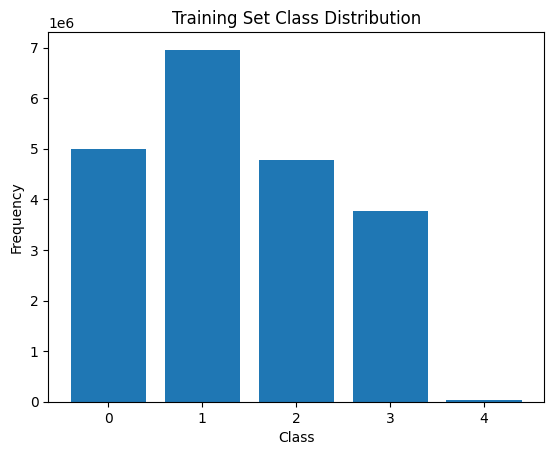

Training Set Class Distribution:
Class 0.0: 3646241 samples (24.69%)
Class 1.0: 4944847 samples (33.48%)
Class 2.0: 3516709 samples (23.81%)
Class 3.0: 2642659 samples (17.89%)
Class 4.0: 19720 samples (0.13%)


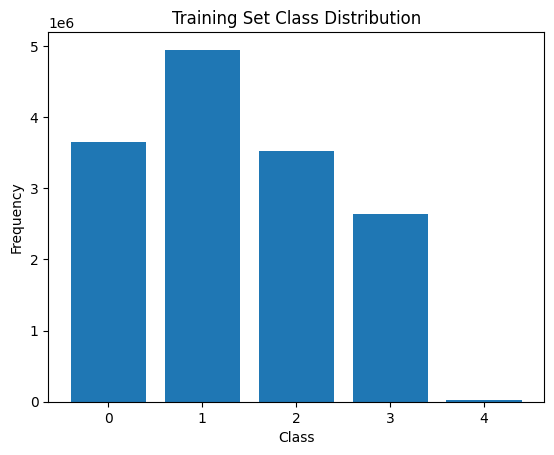

Validation Set Class Distribution:
Class 0.0: 862079 samples (23.33%)
Class 1.0: 1314515 samples (35.58%)
Class 2.0: 814783 samples (22.05%)
Class 3.0: 697228 samples (18.87%)
Class 4.0: 5987 samples (0.16%)


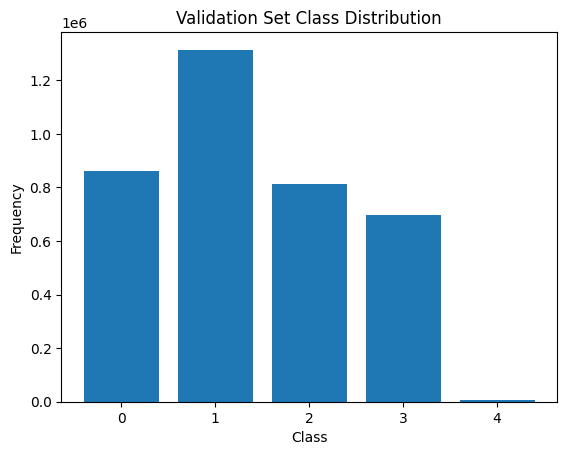

Test Set Class Distribution:
Class 0.0: 480506 samples (23.37%)
Class 1.0: 698176 samples (33.95%)
Class 2.0: 445318 samples (21.66%)
Class 3.0: 430936 samples (20.96%)
Class 4.0: 1256 samples (0.06%)


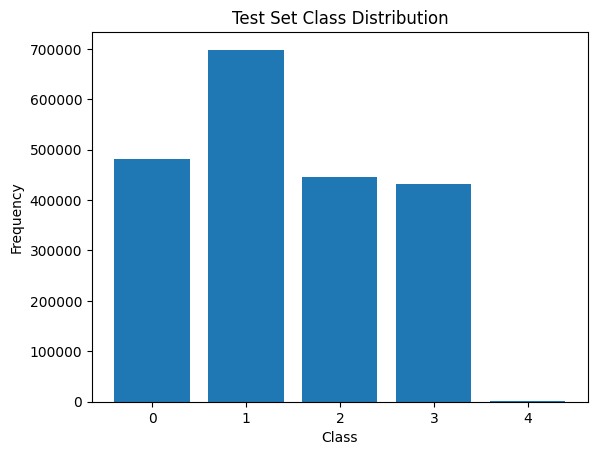

In [8]:
plot_class_distribution(y_train, title="Training Set Class Distribution")
plot_class_distribution(train_lbl, title="Training Set Class Distribution")
plot_class_distribution(val_lbl, title="Validation Set Class Distribution")
plot_class_distribution(test_lbl, title="Test Set Class Distribution")

In [10]:
# Definition of hyperparameters

data_params = {
    'batch_size': 32,
    'input_shape': (64, 128, 3),
    'num_classes': 5,
    'seed': 42
}

HYPERPARAMETERS = {
    "BATCH_SIZE": 32,
    "EPOCHS": 200,
    "LEARNING_RATE": 0.001,
    "LEARNING_DESCENT_PATIENCE": 20,
    "LEARNING_DESCENT_FACTOR": 0.5,
    "EARLY_STOPPING_PATIENCE": 30,
    "DROPOUT": 0.4,
    "LAYERS_FINE_TUNE": 0,
    "MODEL_NAME": "boh",
}

In [11]:
import tensorflow as tf
import numpy as np
@tf.function
def preprocess(image, label):
    """
    Assicura che immagine e maschera abbiano la dimensione corretta.
    """
    if image is not None and len(image.shape) == 2:
        image = tf.expand_dims(image, axis=-1)  # Aggiungi dimensione del canale
    if len(label.shape) == 2:
        label = tf.expand_dims(label, axis=-1)  # Aggiungi dimensione del canale
    return image, label
@tf.function
def random_flip(image, label):
    """Consistent random horizontal flip per immagini a 1 canale."""
    flip_prob = tf.random.uniform([])

    # Applica il flip orizzontale in modo consistente sia a immagine che a maschera
    image = tf.cond(
        flip_prob > 0.5,
        lambda: tf.image.flip_left_right(image),
        lambda: image
    )
    label = tf.cond(
        flip_prob > 0.5,
        lambda: tf.image.flip_left_right(label),
        lambda: label
    )
    return image, label

@tf.function
def random_translation(image, label, max_translation=(20, 20)):
    """
    Applica una traslazione casuale a immagine e maschera usando TensorFlow.
    Args:
        image: Tensor dell'immagine.
        label: Tensor della maschera.
        max_translation: Massima traslazione (altezza, larghezza).
    Returns:
        Immagine e maschera traslate.
    """
    # Genera un valore casuale per decidere quali assi traslare
    apply_x = tf.random.uniform([], 0, 1) > 0.5  # Probabilità del 50% di traslare su X
    apply_y = tf.random.uniform([], 0, 1) > 0.5  # Probabilità del 50% di traslare su Y

    # Genera traslazioni casuali solo per gli assi attivi
    tx = tf.random.uniform([], -max_translation[0], max_translation[0], dtype=tf.int32) if apply_x else 0
    ty = tf.random.uniform([], -max_translation[1], max_translation[1], dtype=tf.int32) if apply_y else 0

    # Applica la traslazione
    image = tf.roll(image, shift=[tx, ty], axis=[0, 1])
    label = tf.roll(label, shift=[tx, ty], axis=[0, 1])
    return image, label


@tf.function
def random_zoom(image, label, zoom_range=(0.8, 1.2)):
    """
    Applica uno zoom casuale a immagine e maschera, assicurando dimensioni valide.
    Args:
        image: Tensor dell'immagine.
        label: Tensor della maschera.
        zoom_range: Range per il fattore di zoom.
    Returns:
        Immagine e maschera zoomate.
    """
    # Aggiungi una dimensione del canale se mancante
    if len(image.shape) == 2:
        image = tf.expand_dims(image, axis=-1)
    if len(label.shape) == 2:
        label = tf.expand_dims(label, axis=-1)


    zoom_factor = tf.random.uniform([], zoom_range[0], zoom_range[1])
    original_size = tf.cast(tf.shape(image)[1:3], tf.float32)  # Ottieni altezza e larghezza
    new_size = tf.cast(original_size * zoom_factor, tf.int32)

    # Assicura che le dimensioni siano valide
    new_size = tf.maximum(new_size, 1)

    # Ridimensiona l'immagine
    image = tf.image.resize(image, new_size, method='bilinear')
    label = tf.image.resize(label, new_size, method='nearest')

    # Ripristina alla dimensione originale
    image = tf.image.resize_with_crop_or_pad(image, tf.shape(image)[1], tf.shape(image)[2])
    label = tf.image.resize_with_crop_or_pad(label, tf.shape(label)[1], tf.shape(label)[2])


    image = tf.squeeze(image, axis=-1)
    label = tf.squeeze(label, axis=-1)

    return image, label

@tf.function
def augment_pipeline(image, label):
    image, label = preprocess(image, label)
    image, label = random_flip(image, label)
    #image, label = random_zoom(image, label)
    image, label = random_translation(image, label)



    return image, label



In [12]:
def make_dataset(train_images, train_labels, batch_size, shuffle=True, augment=False, seed=None):
    """
    Create a memory-efficient TensorFlow dataset.
    """
    # Create dataset from file paths
    dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=batch_size * 2, seed=seed)

    if augment:
        dataset = dataset.map(
            lambda x, y: augment_pipeline(x, y),
            num_parallel_calls=tf.data.AUTOTUNE
        )

    # Batch the data
    dataset = dataset.batch(batch_size, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

In [13]:
# Create the datasets
print("Creating datasets...")

train_dataset = make_dataset(
    train_img, train_lbl,
    batch_size= HYPERPARAMETERS['BATCH_SIZE'],
    shuffle=True,
    augment=True
)

val_dataset = make_dataset(
    val_img, val_lbl,
    batch_size= HYPERPARAMETERS['BATCH_SIZE'],
    shuffle=False,
)

test_dataset = make_dataset(
    test_img, test_lbl,
    batch_size= HYPERPARAMETERS['BATCH_SIZE'],
    shuffle=False
)
print("Datasets created!")

# Check the shape of the data
for images, labels in train_dataset.take(1):
    input_shape = images.shape[1:]
    print(f"\nInput shape: {input_shape}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Labels dtype:", labels.dtype)
    break

Creating datasets...
Datasets created!

Input shape: (64, 128, 1)
Images shape: (32, 64, 128, 1)
Labels shape: (32, 64, 128, 1)
Labels dtype: <dtype: 'float64'>


Visualizing examples from the training set:


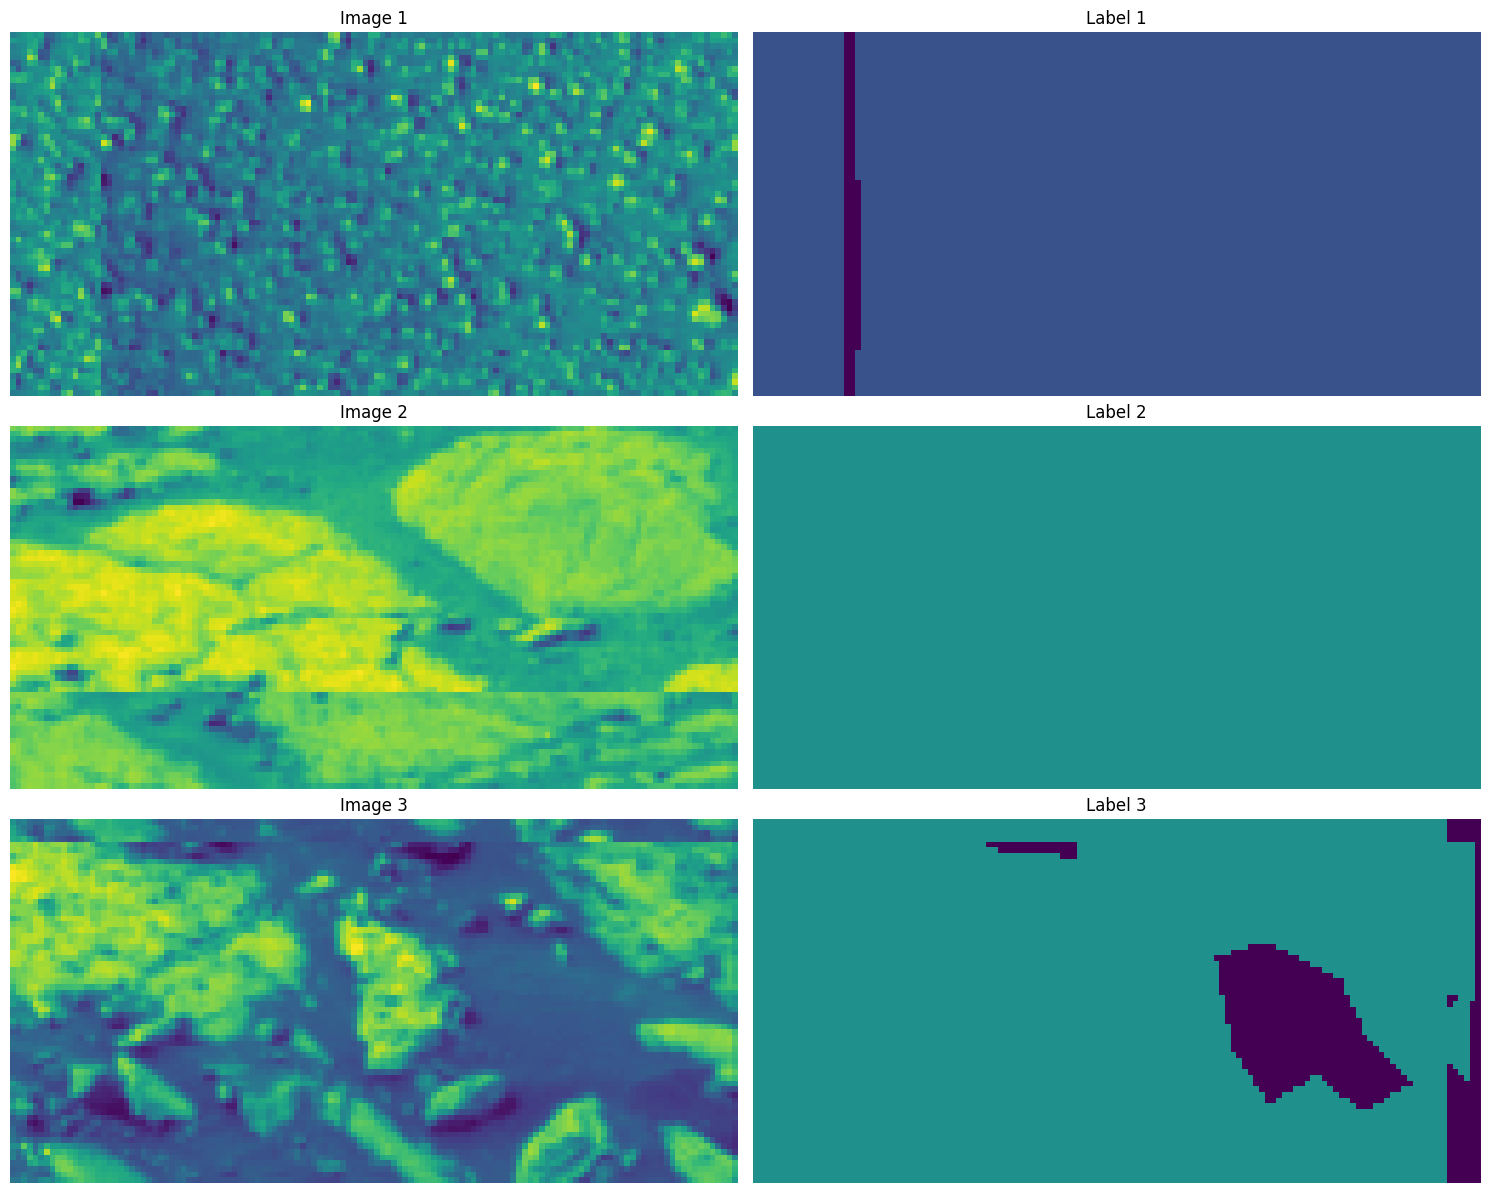

In [14]:
def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

def plot_sample_batch(dataset, num_samples=3):
    """
    Display some image and label pairs from the dataset.
    """
    plt.figure(figsize=(15, 4*num_samples))

    for images, labels in dataset.take(1):
        labels_np = labels.numpy()
        num_classes = len(np.unique(labels_np))
        colormap = create_segmentation_colormap(num_classes)

        for j in range(min(num_samples, len(images))):
            # Plot original image
            plt.subplot(num_samples, 2, j*2 + 1)
            plt.imshow(images[j])
            plt.title(f'Image {j+1}')
            plt.axis('off')

            # Plot colored label
            plt.subplot(num_samples, 2, j*2 + 2)
            colored_label = apply_colormap(labels_np[j], colormap)
            plt.imshow(colored_label)
            plt.title(f'Label {j+1}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

# Visualize examples from the training set
print("Visualizing examples from the training set:")
plot_sample_batch(train_dataset, num_samples=3)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers as tfkl

# Residual Block
def residual_block(x, filters, kernel_size=3, activation='relu', name=''):
    shortcut = tfkl.Conv2D(filters, kernel_size=1, padding='same', kernel_initializer='he_normal', name=name + '_shortcut')(x)
    x = tfkl.Conv2D(filters, kernel_size, padding='same', kernel_initializer='he_normal', name=name + '_conv1')(x)
    x = tfkl.BatchNormalization(name=name + '_bn1')(x)
    x = tfkl.Activation(activation, name=name + '_activation1')(x)

    x = tfkl.Conv2D(filters, kernel_size, padding='same', kernel_initializer='he_normal', name=name + '_conv2')(x)
    x = tfkl.BatchNormalization(name=name + '_bn2')(x)
    x = tfkl.Add(name=name + '_add')([x, shortcut])
    x = tfkl.Activation(activation, name=name + '_activation2')(x)
    return x

# Attention Block
def attention_block(g, x, filters, name=''):
    theta_x = tfkl.Conv2D(filters, (1, 1), padding='same', kernel_initializer='he_normal', name=name + '_theta')(x)
    phi_g = tfkl.Conv2D(filters, (1, 1), padding='same', kernel_initializer='he_normal', name=name + '_phi')(g)
    f = tfkl.Activation('relu', name=name + '_activation')(tfkl.Add(name=name + '_add')([theta_x, phi_g]))
    psi_f = tfkl.Conv2D(1, (1, 1), padding='same', activation='sigmoid', kernel_initializer='he_normal', name=name + '_psi')(f)
    return tfkl.Multiply(name=name + '_multiply')([x, psi_f])

# U-Net with Attention and Residual Blocks
def get_segmentation_model(input_shape=input_shape, num_classes=num_classes, dropout_rate=0.0):
    inputs = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling Path
    d1 = residual_block(inputs, 64, name='down_block1')
    p1 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool1')(d1)

    d2 = residual_block(p1, 128, name='down_block2')
    p2 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool2')(d2)

    d3 = residual_block(p2, 256, name='down_block3')
    p3 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool3')(d3)

    d4 = residual_block(p3, 512, name='down_block4')
    p4 = tfkl.MaxPooling2D(pool_size=(2, 2), name='pool4')(d4)

    # Bottleneck with Dropout and Dilated Convolutions
    b = residual_block(p4, 1024, name='bottleneck')  # Aumenta i filtri per il bottleneck
    b = tfkl.Dropout(dropout_rate, name='bottleneck_dropout')(b)

    # Upsampling Path with Attention
    u4 = tfkl.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same', name='up_block4_upsample')(b)
    a4 = attention_block(u4, d4, 512, name='up_block4_attention')
    u4 = tfkl.Concatenate(name='up_block4_concat')([u4, a4])
    u4 = residual_block(u4, 512, name='up_block4')

    u3 = tfkl.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', name='up_block3_upsample')(u4)
    a3 = attention_block(u3, d3, 256, name='up_block3_attention')
    u3 = tfkl.Concatenate(name='up_block3_concat')([u3, a3])
    u3 = residual_block(u3, 256, name='up_block3')

    u2 = tfkl.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', name='up_block2_upsample')(u3)
    a2 = attention_block(u2, d2, 128, name='up_block2_attention')
    u2 = tfkl.Concatenate(name='up_block2_concat')([u2, a2])
    u2 = residual_block(u2, 128, name='up_block2')

    u1 = tfkl.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', name='up_block1_upsample')(u2)
    a1 = attention_block(u1, d1, 64, name='up_block1_attention')
    u1 = tfkl.Concatenate(name='up_block1_concat')([u1, a1])
    u1 = residual_block(u1, 64, name='up_block1')

    conv_output = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', name='output_conv_layer')(u1)
    outputs = tfkl.Activation('softmax', name='output_activation_layer')(conv_output)

    # Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Advanced_UNet')
    return model



In [14]:

model = get_segmentation_model()

# Print a detailed summary of the model with expanded nested layers and trainable parameters.
model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
tf.keras.utils.plot_model(
    model,
    to_file='model.png',         # Salva il grafico come file
    show_shapes=True,            # Mostra le forme degli input e output
    show_layer_names=True,       # Mostra i nomi dei layer
    expand_nested=False,         # Non espandere i layer annidati
    dpi=70                       # Riduci la risoluzione del grafico
)

Model: "Advanced_UNet"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_layer (InputLayer)       [(None, 64, 128, 1)  0           []                               Y          
                                ]                                                                            
                                                                                                             
 down_block1_conv1 (Conv2D)     (None, 64, 128, 64)  640         ['input_layer[0][0]']            Y          
                                                                                                             
 down_block1_bn1 (BatchNormaliz  (None, 64, 128, 64)  256        ['down_block1_conv1[0][0]']      Y          
 ation)                                                                                          

In [33]:
import tensorflow as tf
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)


# Visualization callback
class VizCallback(tf.keras.callbacks.Callback):
    def __init__(self, image_paths, label_paths, frequency=40):
        super().__init__()
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.frequency == 0:  # Visualize only every "frequency" epochs
            image = self.image_paths[261]
            label = self.label_paths[261]
            image1 = tf.expand_dims(image, 0)
            pred = self.model.predict(image1, verbose=0)
            y_pred = tf.math.argmax(pred, axis=-1)
            y_pred = y_pred.numpy()

            colors = ['red', 'green', 'blue', 'orange', 'purple']  # Adjust colors as needed
            class_labels = ['background', 'soil', 'bedrock', 'sand', 'big_rock']  # Add your class labels
            cmap = ListedColormap(colors)

            # Number of images to display
            num_images = 3

            # Select random indices

            # Create the plot
            fig, axes = plt.subplots(num_images, 4, figsize=(12, 20))  # Adjust width to fit legend


                # Display the grayscale image
            axes[0, 0].imshow(image, cmap='gray')
            axes[0, 0].set_title(f"Image 261")
            axes[0, 0].axis('off')

                # Display the mask with the custom colormap
            axes[0, 1].imshow(label, cmap=cmap, vmin=0, vmax=len(colors) - 1)
            axes[0, 1].set_title(f"True 261")
            axes[0, 1].axis('off')

            axes[0, 2].imshow(y_pred[0], cmap=cmap, vmin=0, vmax=len(colors) - 1)
            axes[0, 2].set_title(f"prediction 261")
            axes[0, 2].axis('off')

            patches = [mpatches.Patch(color=colors[j], label=class_labels[j]) for j in range(len(colors))]
            axes[0, 3].legend(
                    handles=patches,
                    loc='center',
                    title="Classes",
                    bbox_to_anchor=(0.5, 0.5),
                )
            axes[0, 3].axis('off')

            image = self.image_paths[28]
            label = self.label_paths[28]
            image1 = tf.expand_dims(image, 0)
            pred = self.model.predict(image1, verbose=0)
            y_pred = tf.math.argmax(pred, axis=-1)
            y_pred = y_pred.numpy()

                # Display the grayscale image
            axes[1, 0].imshow(image, cmap='gray')
            axes[1, 0].set_title(f"Image 28")
            axes[1, 0].axis('off')

                # Display the mask with the custom colormap
            axes[1, 1].imshow(label, cmap=cmap, vmin=0, vmax=len(colors) - 1)
            axes[1, 1].set_title(f"True 28")
            axes[1, 1].axis('off')

            axes[1, 2].imshow(y_pred[0], cmap=cmap, vmin=0, vmax=len(colors) - 1)
            axes[1, 2].set_title(f"prediction 28")
            axes[1, 2].axis('off')

            patches = [mpatches.Patch(color=colors[j], label=class_labels[j]) for j in range(len(colors))]
            axes[1, 3].legend(
                    handles=patches,
                    loc='center',
                    title="Classes",
                    bbox_to_anchor=(0.5, 0.5),
                )
            axes[1, 3].axis('off')

            r=random.randint(0, 200)
            image = self.image_paths[r]
            label = self.label_paths[r]
            image1 = tf.expand_dims(image, 0)
            pred = self.model.predict(image1, verbose=0)
            y_pred = tf.math.argmax(pred, axis=-1)
            y_pred = y_pred.numpy()

            axes[2, 0].imshow(image, cmap='gray')
            axes[2, 0].set_title(f"Image {r}")
            axes[2, 0].axis('off')

                # Display the mask with the custom colormap
            axes[2, 1].imshow(label, cmap=cmap, vmin=0, vmax=len(colors) - 1)
            axes[2, 1].set_title(f"True {r}")
            axes[2, 1].axis('off')

            axes[2, 2].imshow(y_pred[0], cmap=cmap, vmin=0, vmax=len(colors) - 1)
            axes[2, 2].set_title(f"prediction {r}")
            axes[2, 2].axis('off')

            patches = [mpatches.Patch(color=colors[j], label=class_labels[j]) for j in range(len(colors))]
            axes[2, 3].legend(
                    handles=patches,
                    loc='center',
                    title="Classes",
                    bbox_to_anchor=(0.5, 0.5),
                )
            axes[2, 3].axis('off')


            plt.tight_layout()
            plt.show()

In [34]:
def hybrid_loss(y_true, y_pred):
    """
    Combina Categorical Cross-Entropy e Dice Loss.
    Args:
        y_true: Tensor delle etichette vere (sparse o one-hot encoded).
        y_pred: Tensor delle predizioni (probabilità per classe).
    Returns:
        La perdita combinata (CCE + Dice).
    """

    # Categorical Cross-Entropy
    cce = tf.keras.losses.SparseCategoricalCrossentropy()
    cce_loss = cce(y_true, y_pred)


    # Converti y_true in one-hot encoding se è in formato sparso
    if len(y_true.shape) == len(y_pred.shape) - 1:  # Caso di Sparse Labels
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=y_pred.shape[-1])

    # Dice Loss
    smooth = 1e-5
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    dice_loss = 1 - (2. * intersection + smooth) / (
        tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) + smooth
    )

    # Combina le perdite
    total_loss = cce_loss + dice_loss
    return total_loss

In [35]:
# Compile the model
print("Compiling model...")
model.compile(
    loss=hybrid_loss,
    optimizer=tf.keras.optimizers.Adam(HYPERPARAMETERS['LEARNING_RATE']),
    metrics=[MeanIntersectionOverUnion(num_classes=5, labels_to_exclude=[0]), 'accuracy']
)
print("Model compiled!")

Compiling model...
Model compiled!


In [36]:
# Setup callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_mean_iou',
    mode='max',
    patience=HYPERPARAMETERS['EARLY_STOPPING_PATIENCE'],
    restore_best_weights=True
)

viz_callback = VizCallback(val_img, val_lbl)


Epoch 1/200
56/57 [============================>.] - ETA: 0s - loss: 0.0605 - mean_iou: 0.8796 - accuracy: 0.9648

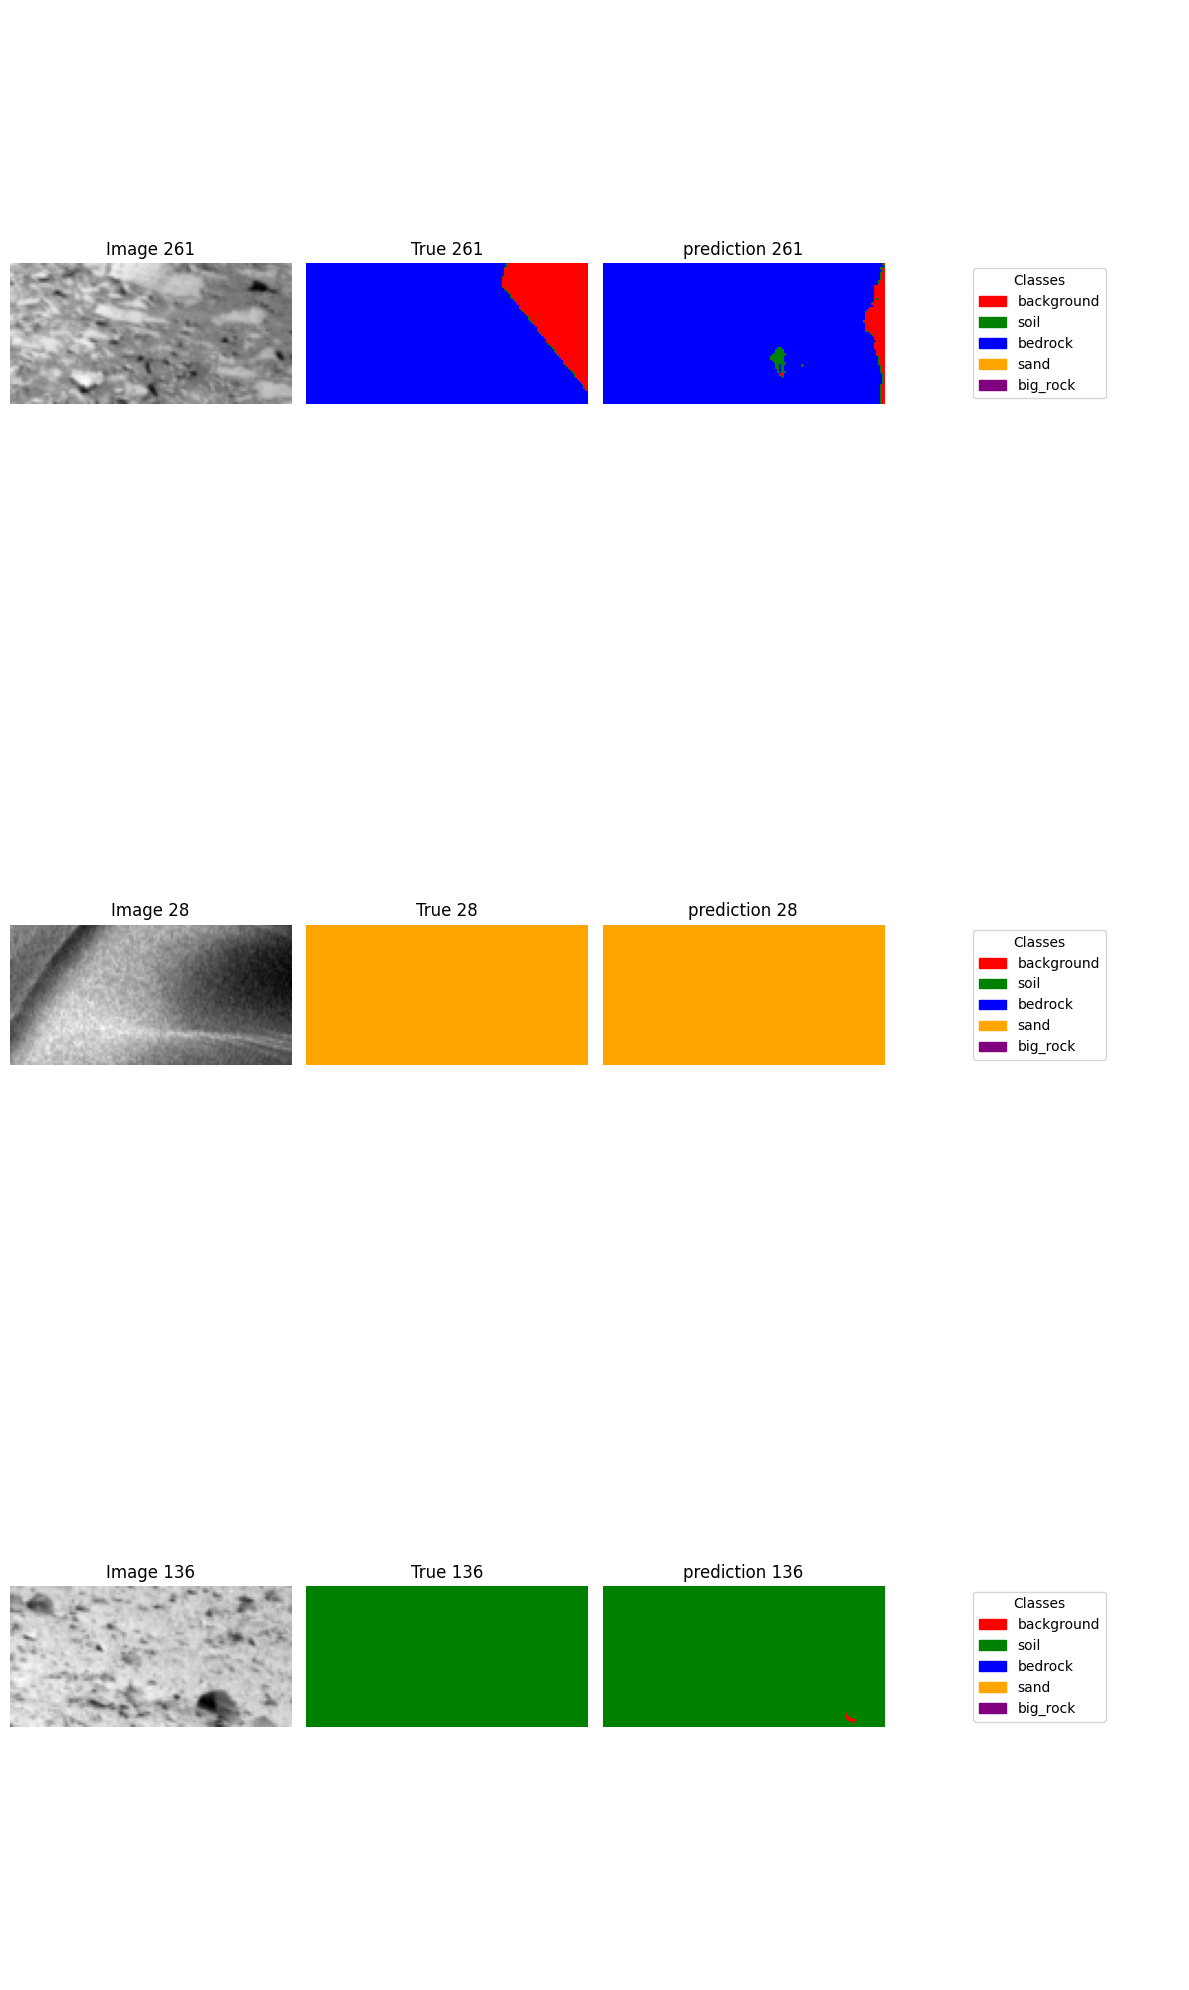

57/57 [==============================] - 10s 147ms/step - loss: 0.0595 - mean_iou: 0.8796 - accuracy: 0.9647 - val_loss: 1.0403 - val_mean_iou: 0.5735 - val_accuracy: 0.8142
Epoch 2/200
57/57 [==============================] - 7s 123ms/step - loss: 0.0553 - mean_iou: 0.8839 - accuracy: 0.9658 - val_loss: 1.0444 - val_mean_iou: 0.5729 - val_accuracy: 0.8128
Epoch 3/200
57/57 [==============================] - 7s 123ms/step - loss: 0.0544 - mean_iou: 0.8801 - accuracy: 0.9660 - val_loss: 0.9667 - val_mean_iou: 0.5804 - val_accuracy: 0.8224
Epoch 4/200
57/57 [==============================] - 7s 120ms/step - loss: 0.0525 - mean_iou: 0.8844 - accuracy: 0.9669 - val_loss: 0.8864 - val_mean_iou: 0.5759 - val_accuracy: 0.8223
Epoch 5/200
57/57 [==============================] - 7s 120ms/step - loss: 0.0534 - mean_iou: 0.8880 - accuracy: 0.9664 - val_loss: 1.0815 - val_mean_iou: 0.5325 - val_accuracy: 0.7931
Epoch 6/200
57/57 [==============================] - 7s 120ms/step - loss: 0.0608 - me

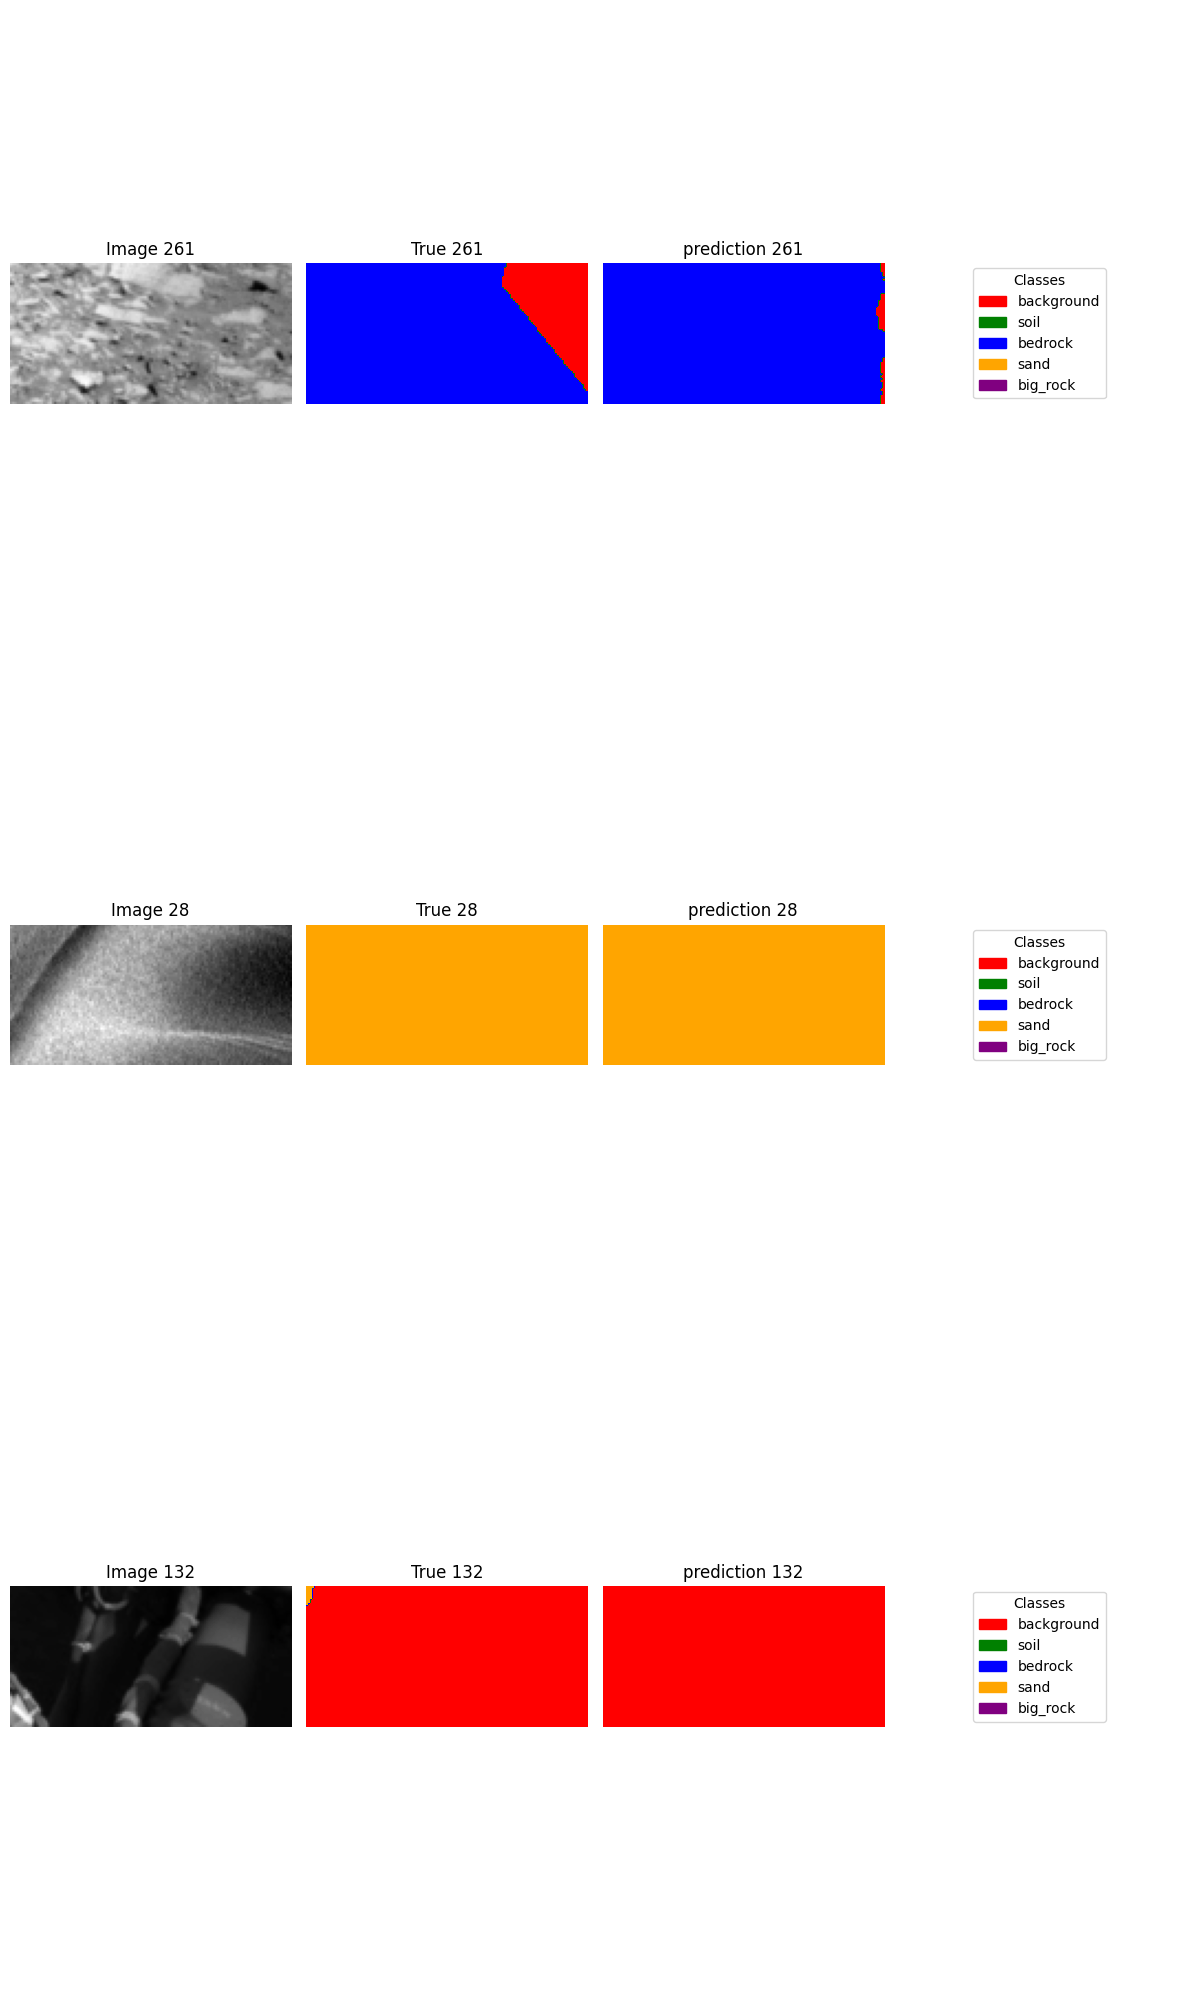

57/57 [==============================] - 7s 126ms/step - loss: 0.0599 - mean_iou: 0.8916 - accuracy: 0.9664 - val_loss: 0.9437 - val_mean_iou: 0.5776 - val_accuracy: 0.8246
Epoch 42/200
57/57 [==============================] - 7s 119ms/step - loss: 0.0491 - mean_iou: 0.8927 - accuracy: 0.9683 - val_loss: 0.9465 - val_mean_iou: 0.5748 - val_accuracy: 0.8268
Epoch 43/200
57/57 [==============================] - 7s 119ms/step - loss: 0.0463 - mean_iou: 0.9014 - accuracy: 0.9693 - val_loss: 0.9655 - val_mean_iou: 0.5790 - val_accuracy: 0.8298
Epoch 44/200
57/57 [==============================] - 7s 118ms/step - loss: 0.0500 - mean_iou: 0.8938 - accuracy: 0.9680 - val_loss: 1.0124 - val_mean_iou: 0.5676 - val_accuracy: 0.8236
Epoch 45/200
57/57 [==============================] - 7s 120ms/step - loss: 0.0502 - mean_iou: 0.8876 - accuracy: 0.9677 - val_loss: 0.9847 - val_mean_iou: 0.5666 - val_accuracy: 0.8255
Epoch 46/200
57/57 [==============================] - 7s 123ms/step - loss: 0.0495 

In [37]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=200,
    validation_data=val_dataset,
    callbacks=[early_stopping, viz_callback],
    verbose=1
).history

# Calculate and print the final validation accuracy
final_val_meanIoU = round(max(history['val_mean_iou'])* 100, 2)
print(f'Final validation Mean Intersection Over Union: {final_val_meanIoU}%')


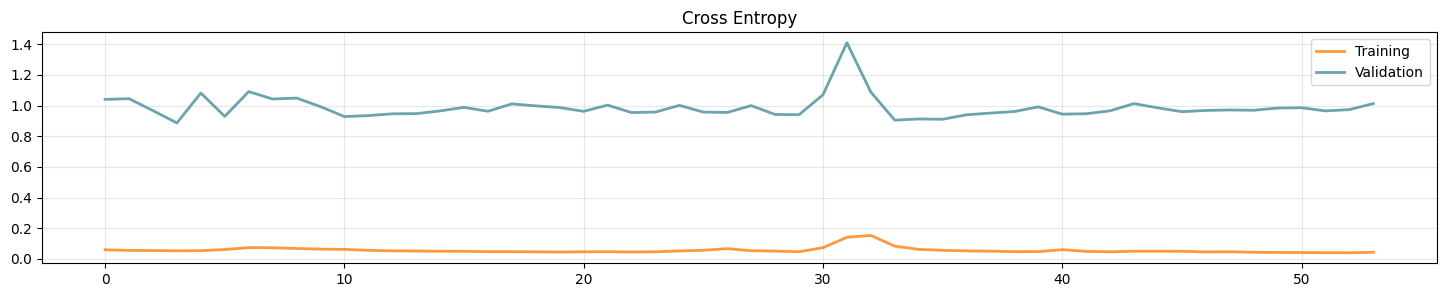

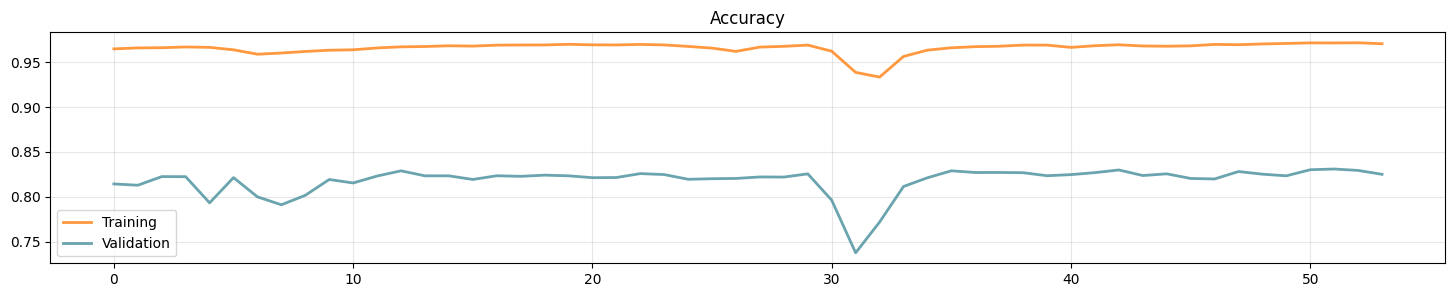

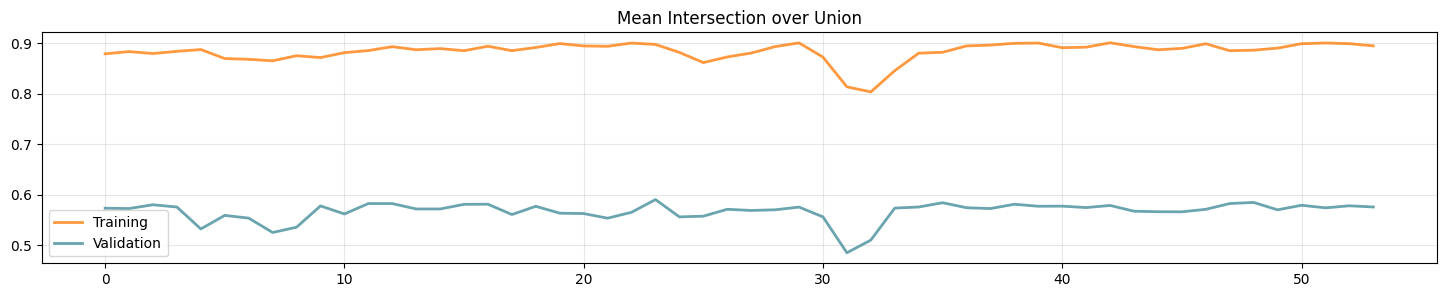

In [38]:
# Plot and display training and validation loss
plt.figure(figsize=(18, 3))
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_loss'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Cross Entropy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation accuracy
plt.figure(figsize=(18, 3))
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation mean IoU
plt.figure(figsize=(18, 3))
plt.plot(history['mean_iou'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_mean_iou'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Mean Intersection over Union')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [39]:
# Evaluate the model on the test set and print the results
test_loss, test_mean_iou, test_accuracy = model.evaluate(test_dataset, verbose=0, batch_size=10)
print(f'Test Accuracy: {round(test_accuracy, 4)}')
print(f'Test Mean Intersection over Union: {round(test_mean_iou, 4)}')

Test Accuracy: 0.8044
Test Mean Intersection over Union: 0.5511


In [40]:
# save the model

# Define the directory where you want to save the model
save_directory = "\saved_models"

timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model{int(round(test_mean_iou, 4)*1000)}.keras"


# Save the model
model.save(model_filename)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


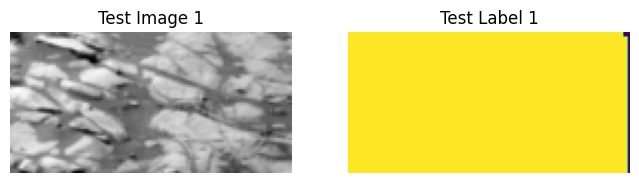

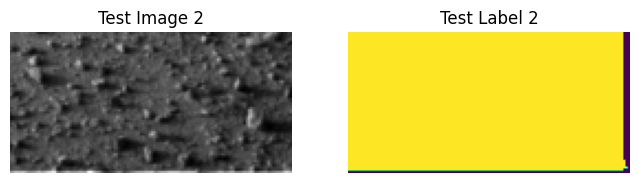

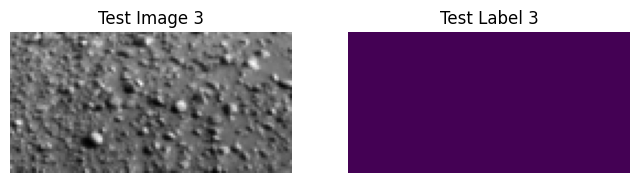

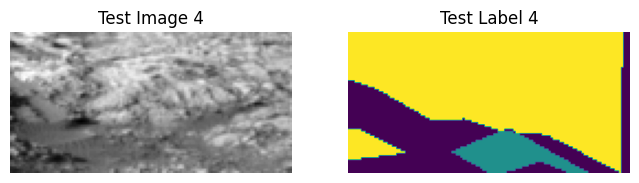

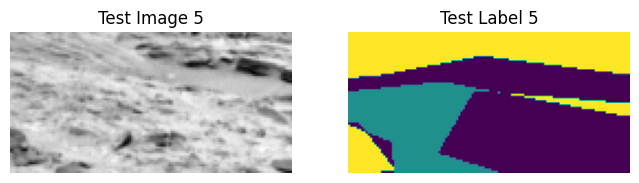

In [41]:
# print the first 5 images and labels of the test dataset

import matplotlib.pyplot as plt
import numpy as np

# Assuming test_dataset is defined and contains (image, label) pairs
# and X_test is available as defined in the previous code

# Number of images to display
num_images = 5

# Select the first 5 images and labels
for i in range(num_images):
    image, label = next(iter(test_dataset))
    image = image[i]
    label = label[i]

    # Display the grayscale image
    plt.figure(figsize=(8, 4))  # Adjust figure size for better visualization
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(image), cmap='gray')  # Squeeze to remove single-dimensional entries
    plt.title(f"Test Image {i + 1}")
    plt.axis('off')

    # Display the label (assuming it's a segmentation mask)
    plt.subplot(1, 2, 2)
    plt.imshow(label, cmap='viridis')  # Choose a suitable colormap
    plt.title(f"Test Label {i + 1}")
    plt.axis('off')

    plt.show()

In [42]:
# Evaluate the model
loss, accuracy, mean_iou = model.evaluate(test_dataset, verbose=1)


# Print the results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Mean IoU: {mean_iou:.4f}")

# Make predictions
predictions = model.predict(test_dataset)


# Process predictions (example: convert probabilities to class labels)
predicted_labels = np.argmax(predictions, axis=-1)


8/8 [==============================] - 1s 41ms/step - loss: 1.1427 - mean_iou: 0.5511 - accuracy: 0.8044
Test Loss: 1.1427
Test Accuracy: 0.5511
Test Mean IoU: 0.8044
8/8 [==============================] - 1s 40ms/step


## 📊 Prepare Your Submission

In our Kaggle competition, submissions are made as `csv` files. To create a proper `csv` file, you need to flatten your predictions and include an `id` column as the first column of your dataframe. To maintain consistency between your results and our solution, please avoid shuffling the test set. The code below demonstrates how to prepare the `csv` file from your model predictions.




In [29]:
# If model_filename is not defined, load the most recent model from Google Drive
if "model_filename" not in globals() or model_filename is None:
    files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith('model_') and f.endswith('.keras')]
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    if files:
        model_filename = files[0]
    else:
        raise FileNotFoundError("No model files found in the current directory.")

In [43]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
print(f"Predictions shape: {preds.shape}")

314/314 [==============================] - 13s 40ms/step
Predictions shape: (10022, 64, 128)


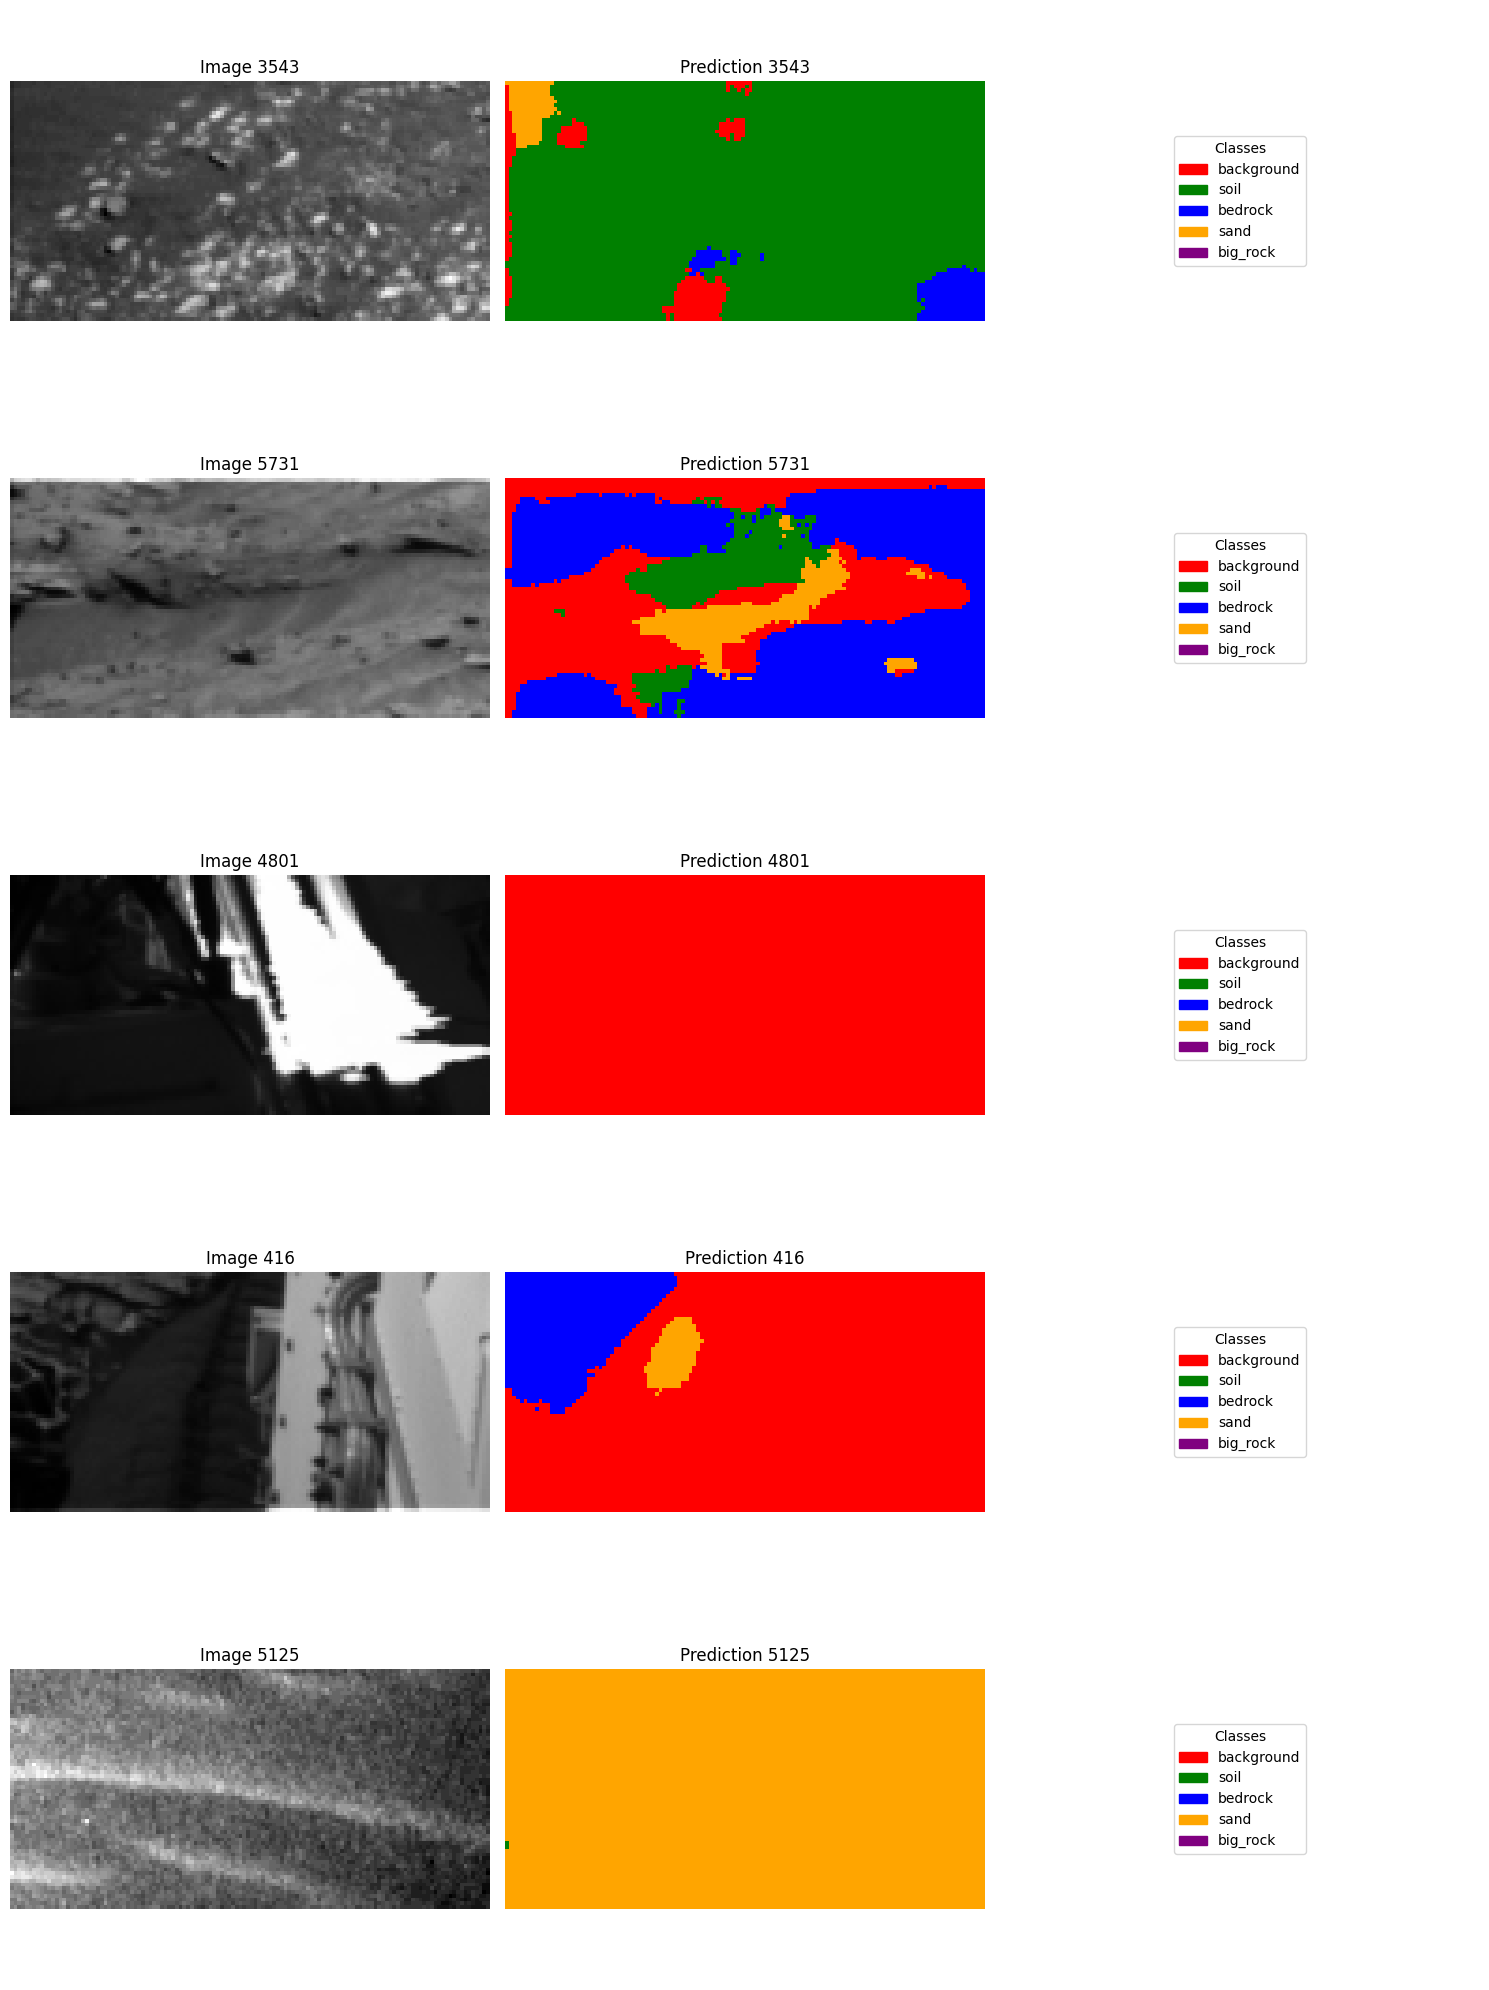

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Definire una mappa dei colori per le classi di segmentazione
colors = ['red', 'green', 'blue', 'orange', 'purple']  # Colori per ogni classe
class_labels = ['background', 'soil', 'bedrock', 'sand', 'big_rock']  # Nomi delle classi
cmap = ListedColormap(colors)

# Numero di immagini da visualizzare
num_images = 5

# Selezionare indici casuali
random_indices = np.random.choice(X_test.shape[0], size=num_images, replace=False)

# Creare la figura
fig, axes = plt.subplots(num_images, 3, figsize=(15, 20))  # 3 colonne: immagine, predizione, legenda

for i, idx in enumerate(random_indices):
    # Immagine originale in scala di grigi
    axes[i, 0].imshow(X_test[idx], cmap='gray')
    axes[i, 0].set_title(f"Image {idx}")
    axes[i, 0].axis('off')

    # Predizione con colormap personalizzato
    axes[i, 1].imshow(preds[idx], cmap=cmap, vmin=0, vmax=len(colors) - 1)
    axes[i, 1].set_title(f"Prediction {idx}")
    axes[i, 1].axis('off')

    # Aggiungere la legenda accanto alla predizione
    patches = [mpatches.Patch(color=colors[j], label=class_labels[j]) for j in range(len(colors))]
    axes[i, 2].legend(
        handles=patches,
        loc='center',
        title="Classes",
        bbox_to_anchor=(0.5, 0.5)
    )
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


In [45]:
def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
submission_filename = f"submission_model5314.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

In [ ]:
import numpy as np

def replace_background_with_most_frequent(preds):
    """
    Sostituisce i pixel di background (0) con il valore della classe
    più frequente in ogni immagine (escludendo il background).

    Args:
        preds: Array NumPy di predizioni, shape (n_samples, height, width).

    Returns:
        Array NumPy trasformato con background sostituito.
    """
    transformed_preds = np.copy(preds)  # Copia delle predizioni

    for idx, pred in enumerate(preds):  # Itera su ogni immagine
        # Conta le occorrenze dei valori di classe, escludendo il background (0)
        unique, counts = np.unique(pred[pred != 0], return_counts=True)
        if len(unique) > 0:  # Controlla che ci siano valori non-background
            # Trova la classe più frequente (escludendo il background)
            most_frequent_class = unique[np.argmax(counts)]

            # Sostituisci i pixel di background con la classe più frequente
            transformed_preds[idx][pred == 0] = most_frequent_class

    return transformed_preds

# Trasforma le predizioni
transformed_preds = replace_background_with_most_frequent(preds)

# Verifica la forma dei dati trasformati
print("Transformed preds shape:", transformed_preds.shape)


Transformed preds shape: (10022, 64, 128)


In [46]:
import numpy as np
from scipy.ndimage import binary_dilation
from tqdm.notebook import tqdm

def expand_foreground_with_progress(preds, structure=np.ones((3, 3))):
    """
    Espande i pixel di classe (non-background) nelle regioni di background (0)
    fino a rimuovere completamente il background, con controllo per immagini vuote.

    Args:
        preds: Array NumPy di predizioni, shape (n_samples, height, width).
        structure: Elemento strutturale per l'espansione (default: matrice 3x3).

    Returns:
        Array NumPy trasformato con il background sostituito tramite espansione.
    """
    transformed_preds = np.copy(preds)  # Copia delle predizioni
    num_images = preds.shape[0]  # Numero totale di immagini

    print("Starting background expansion...")
    for idx in range(num_images):
        pred = preds[idx]

            # Controllo se l'immagine è completamente background
        if np.all(pred == 0):
            # Se l'immagine è solo background, assegna una classe casuale
            random_class = np.random.choice(np.unique(preds[preds != 0]))
            pred[:, :] = random_class
            transformed_preds[idx] = pred
            continue

            # Maschera iniziale del background
        background_mask = (pred == 0)

        # Itera finché ci sono pixel di background
        while np.any(background_mask):
            for cls in np.unique(pred):
                if cls == 0:  # Salta il background
                    continue

                # Maschera della classe corrente
                class_mask = (pred == cls)

                    # Espandi la maschera della classe corrente e applicala ai pixel di background
                expanded_class = binary_dilation(class_mask, structure=structure)
                pred[(expanded_class & background_mask)] = cls

                # Aggiorna la maschera del background
            background_mask = (pred == 0)

        transformed_preds[idx] = pred  # Salva l'immagine trasformata

    print("Background expansion completed!")
    return transformed_preds
# Simulazione con un dataset grande
transformed_preds = expand_foreground_with_progress(preds)

print("Transformed preds shape:", transformed_preds.shape)


Starting background expansion...
Background expansion completed!
Transformed preds shape: (10022, 64, 128)


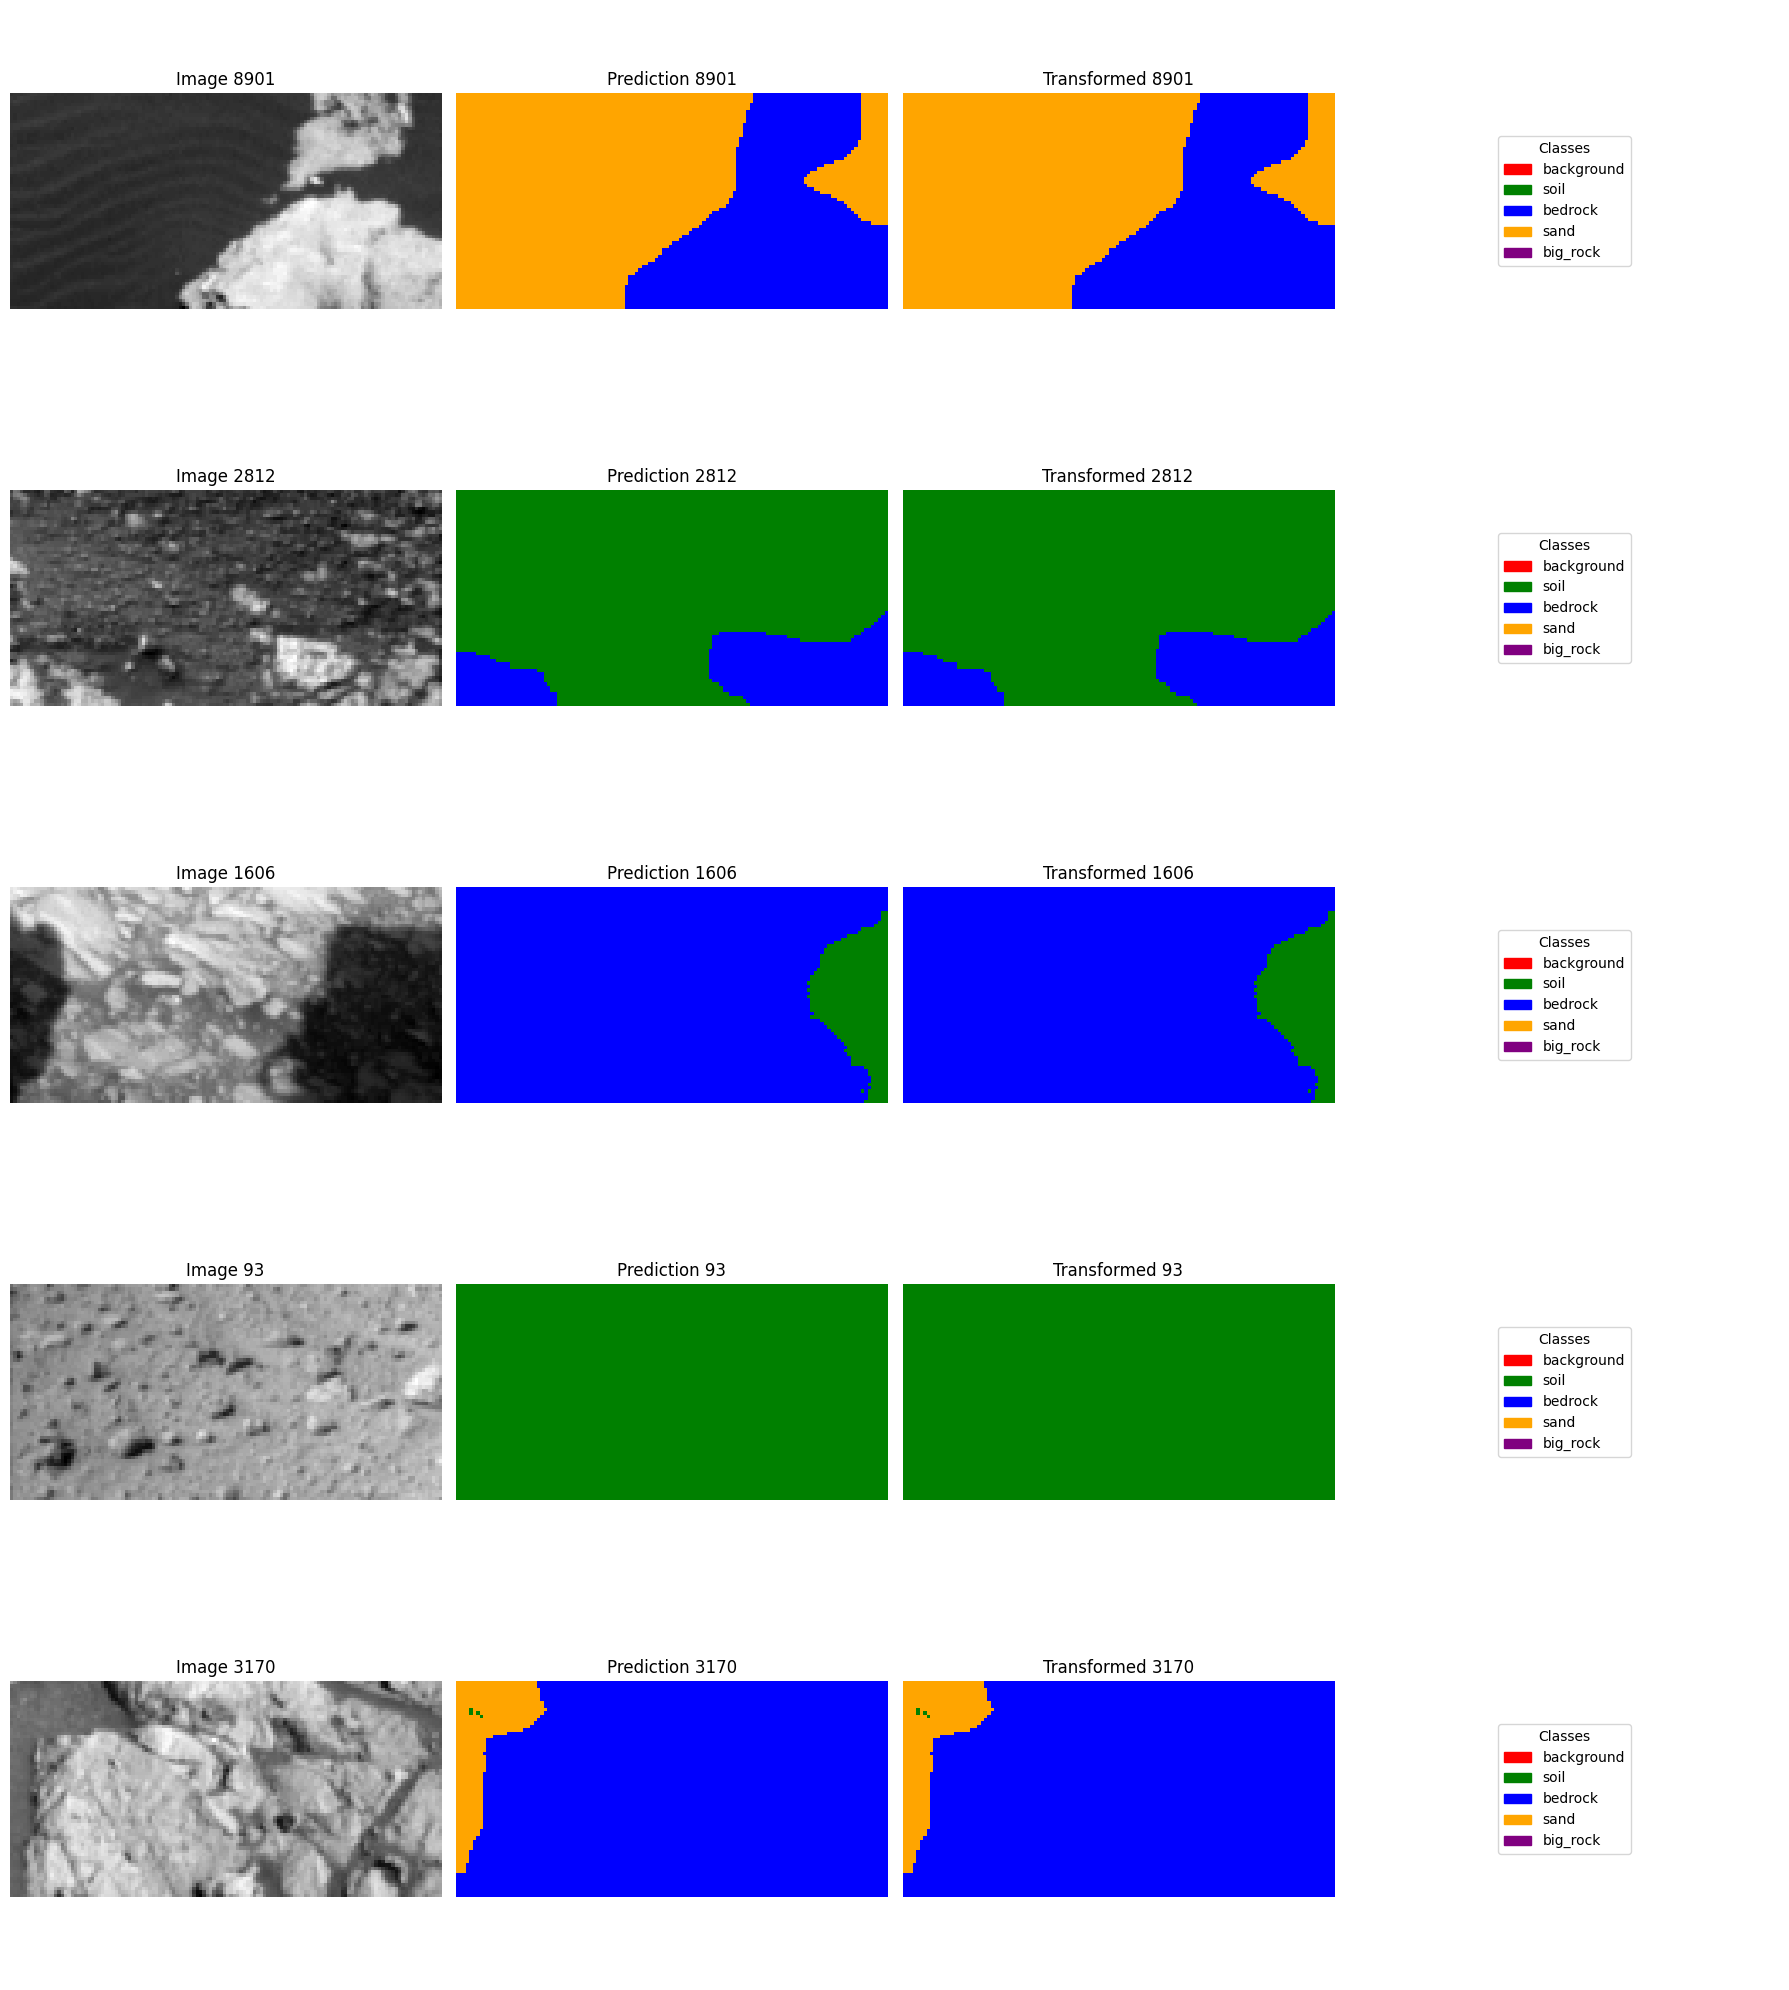

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Definire una mappa dei colori per le classi di segmentazione
colors = ['red', 'green', 'blue', 'orange', 'purple']  # Colori per ogni classe
class_labels = ['background', 'soil', 'bedrock', 'sand', 'big_rock']  # Nomi delle classi
cmap = ListedColormap(colors)

# Numero di immagini da visualizzare
num_images = 5

# Selezionare indici casuali
random_indices = np.random.choice(X_test.shape[0], size=num_images, replace=False)

# Creare la figura
fig, axes = plt.subplots(num_images, 4, figsize=(18, 20))  # 4 colonne: immagine, predizione, trasformata, legenda

for i, idx in enumerate(random_indices):
    # Immagine originale in scala di grigi
    axes[i, 0].imshow(X_test[idx], cmap='gray')
    axes[i, 0].set_title(f"Image {idx}")
    axes[i, 0].axis('off')

    # Predizione originale con colormap personalizzato
    axes[i, 1].imshow(preds[idx], cmap=cmap, vmin=0, vmax=len(colors) - 1)
    axes[i, 1].set_title(f"Prediction {idx}")
    axes[i, 1].axis('off')

    # Predizione trasformata con colormap personalizzato
    axes[i, 2].imshow(transformed_preds[idx], cmap=cmap, vmin=0, vmax=len(colors) - 1)
    axes[i, 2].set_title(f"Transformed {idx}")
    axes[i, 2].axis('off')

    # Aggiungere la legenda accanto alla predizione trasformata
    patches = [mpatches.Patch(color=colors[j], label=class_labels[j]) for j in range(len(colors))]
    axes[i, 3].legend(
        handles=patches,
        loc='center',
        title="Classes",
        bbox_to_anchor=(0.5, 0.5)
    )
    axes[i, 3].axis('off')

plt.tight_layout()
plt.show()


In [48]:
# Create and download the csv submission file
submission_filename = f"submission_551.csv"
submission_df = y_to_df(transformed_preds)
submission_df.to_csv(submission_filename, index=False)
